#                     Demographic Data Analysis

This project analyzes demographic data from the UCI Adult dataset (often used in income prediction tasks).  
It aims to uncover insights about education, working hours, income levels, and other socio-economic factors.

**Dataset source:** [Adult Census Income Dataset](https://archive.ics.uci.edu/ml/datasets/adult)

---

### Objectives
1. Explore the dataset to understand its structure.
2. Compute demographic statistics such as:
   - Average age of men
   - Percentage with Bachelor's degree
   - Income distributions across education levels
   - Richest countries and common occupations
3. Present clear insights and visualizations.


##  Import Libraries and Load Data
We'll use **Pandas** for data manipulation and **Matplotlib/Seaborn** for visualization.


In [31]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset from my GitHub(Stabat47) raw link (originally a freecodecamp project on data analysis with python)
url = "https://raw.githubusercontent.com/Stabat47/Demographic-Data-Analyzer/main/adult.data.csv"
df = pd.read_csv(url)

# Cleaning whitespaces in string columns
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)


# Display first few rows
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##  Basic Data Overview
Let's inspect the structure, data types, and missing values to understand what we're working with.


In [11]:
# @title
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


###  Data Quality and Structure

The dataset *above* contains **32,561 entries** and **15 columns**.  
All columns are non-null, meaning there are **no missing values** to handle — which simplifies the cleaning process.

| Feature | Description |
|----------|--------------|
| age | Age of the individual |
| workclass | Type of employment (e.g., Private, Self-emp) |
| fnlwgt | Census weight |
| education | Highest level of education attained |
| education-num | Numeric representation of education |
| marital-status | Marital status |
| occupation | Job type |
| relationship | Family relationship role |
| race | Ethnic group |
| sex | Gender |
| capital-gain | Capital gains recorded |
| capital-loss | Capital losses recorded |
| hours-per-week | Average weekly work hours |
| native-country | Country of origin |
| salary | Income class (<=50K or >50K) |

**Summary:**
- The dataset is well-structured and complete.
- Most features are categorical (`object` type), which are suitable for grouping and counting operations.
- The numeric columns (`age`, `hours-per-week`, `capital-gain`, etc.) are suitable for statistical summaries and visualization.


##  Demographic Insights
Here, we calculate various statistics using Pandas to better understand demographic patterns.


In [12]:
# @title
# Number of each race
race_count = df['race'].value_counts()
print("Number of each race:\n", race_count)

# Average age of men
average_age_men = round(df[df['sex'] == 'Male']['age'].mean(), 1)
print("\nAverage age of men:", average_age_men)

# Percentage with Bachelors degree
percentage_bachelors = round((df['education'] == 'Bachelors').mean() * 100, 1)
print("\nPercentage with Bachelors degrees:", percentage_bachelors)


Number of each race:
 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

Average age of men: 39.4

Percentage with Bachelors degrees: 16.4


###  Demographic Insight analysis

The dataset above provides a diverse representation of racial and gender demographics in the adult population.

- **Race Distribution:**  
  The majority of individuals identify as **White (≈85%)**, followed by **Black (≈10%)**, **Asian-Pac-Islander (≈3%)**, and smaller groups of **Amer-Indian-Eskimo** and **Other** categories.  
  This shows that while the dataset is somewhat imbalanced racially, it still captures multiple ethnic backgrounds, allowing for comparative demographic studies.

- **Average Age of Men:**  
  The **average male age is 39.4 years**, suggesting that most participants are well within the working-age population — a key factor in analyzing income and occupational trends.

- **Educational Attainment:**  
  Approximately **16.4% of the population holds a Bachelor’s degree**, which gives context for higher education representation in this dataset.  
  Considering the variety of education levels present, we can later compare how advanced education correlates with higher income brackets.

Overall, these initial findings help establish a demographic baseline for the dataset, giving us a clearer picture of the population before deeper analysis into education, work hours, and income.


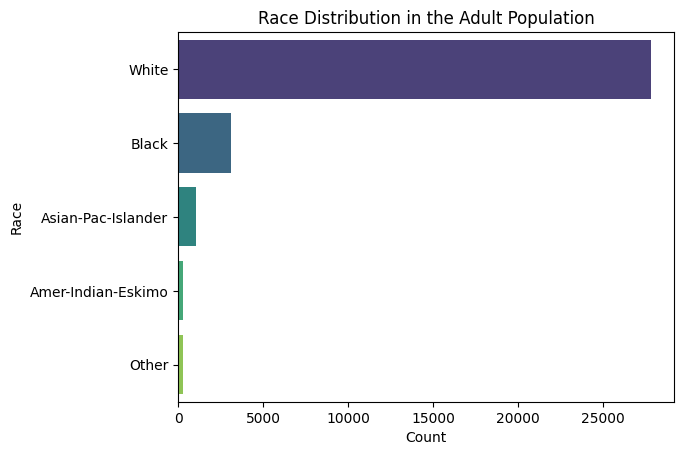

In [21]:
# @title
sns.countplot(
    y='race',
    data=df,
    order=df['race'].value_counts().index,
    hue='race',
    palette='viridis',
    legend=False
)
plt.title('Race Distribution in the Adult Population')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()



The visualization confirms the racial imbalance, with a dominant White representation but notable inclusion of other groups, supporting diverse demographic comparisons.


##  Education and Income Relationship
We'll compare income levels for people with advanced education (Bachelors, Masters, Doctorate) and those without.


In [13]:
# @title
# Education groups
higher_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
lower_education = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]

#Rich percentages
higher_education_rich = round((higher_education['salary'] == '>50K').mean() * 100, 1)
lower_education_rich = round((lower_education['salary'] == '>50K').mean() * 100, 1)

print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")


Percentage with higher education that earn >50K: 46.5%
Percentage without higher education that earn >50K: 17.4%


### Analysis: Income and Education Level

The data shows a significant relationship between education level and income. Individuals with higher education (Bachelor’s, Master’s, or Doctorate) have a substantially greater likelihood of earning more than $50K annually compared to those without higher education. The following chart visualizes this income disparity between the two groups.

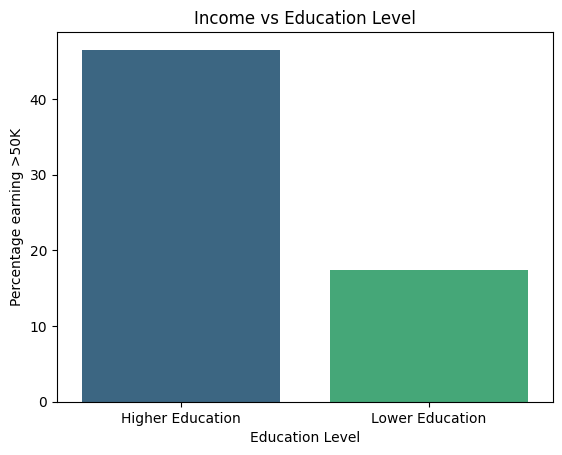

In [20]:
# @title
 sns.barplot(x='Education Level',
            y='Percentage earning >50K',
            hue='Education Level',
            data=pd.DataFrame({
                'Education Level': ['Higher Education', 'Lower Education'],
                'Percentage earning >50K': [higher_education_rich, lower_education_rich]
            }),
            palette='viridis',
            legend=False)
plt.ylabel('Percentage earning >50K')
plt.title('Income vs Education Level')
plt.show()


##  Working Hours and Income
Let's identify the minimum working hours and how income correlates with work time.


In [15]:
# @title
min_work_hours = df['hours-per-week'].min()
rich_percentage = round((df[df['hours-per-week'] == min_work_hours]['salary'] == '>50K').mean() * 100, 1)

print("Minimum work hours per week:", min_work_hours)
print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")


Minimum work hours per week: 1
Percentage of rich among those who work fewest hours: 10.0%


### Working Hours vs Income analysis

When analyzing the relationship between **working hours** and **income**, we find that the *minimum* number of hours worked per week in this dataset is **1 hour**.  
Surprisingly, even among those who work the fewest hours, about **10%** earn more than **$50K annually**.  

This suggests that while working longer hours generally correlates with higher income, there are exceptions — likely individuals with **high-paying part-time roles**, **business owners**, or those with **investment-based income**. It highlights how wealth isn’t always directly tied to time spent working, but also to the **type of work** and **economic opportunities** available.


/tmp/ipython-input-2088296096.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('hours-bin')['salary']


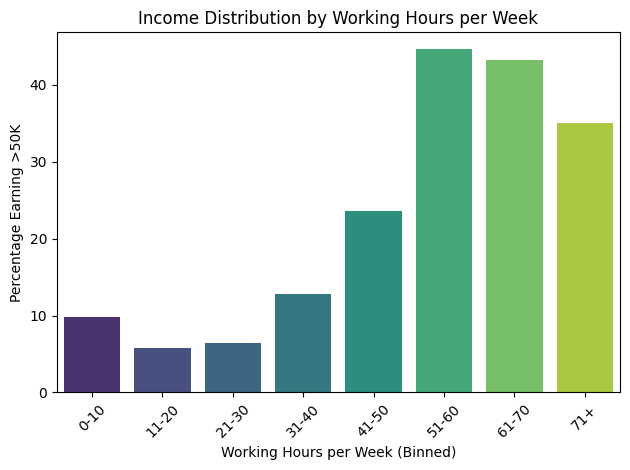

In [30]:
# @title
import numpy as np


# bins for working hours
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
df['hours-bin'] = pd.cut(df['hours-per-week'], bins=bins, labels=labels, right=False)

# rich percentage per bin
income_by_hours = (
    df.groupby('hours-bin')['salary']
      .apply(lambda x: (x == '>50K').mean() * 100)
      .reset_index(name='Percentage >50K')
)

income_by_hours['hue'] = income_by_hours['hours-bin']

# Plot
sns.barplot(
    x='hours-bin',
    y='Percentage >50K',
    data=income_by_hours,
    hue='hue',
    palette='viridis',
    legend=False
)
plt.title('Income Distribution by Working Hours per Week')
plt.xlabel('Working Hours per Week (Binned)')
plt.ylabel('Percentage Earning >50K')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Highest Earning Countries and Occupations
We'll find which country has the highest percentage of high earners and the most common high-paying occupation in India.


In [29]:
# @title
# top occupation in india
top_IN_occupation =  df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]['occupation'].mode()[0]
print("Top occupations in India:", top_IN_occupation)

Top occupations in India: Prof-specialty


###  Income Distribution by Country

The analysis of income by country reveals interesting patterns. Among the top 10 countries with the highest proportion of individuals earning **more than $50K annually**:

- **Iran** leads the list with **41.9%**, followed closely by **France (41.4%)** and **India (40.0%)**.  
- Other notable countries include **Taiwan, Japan, Yugoslavia, Cambodia, Italy, England, and Canada**, all with percentages above 32%.

This indicates that, in this dataset, certain countries have a **higher concentration of high-income earners**, which could reflect differences in **economic structure, professional opportunities, education levels, or cost of living**.  

While the absolute number of high earners might be lower in smaller countries, the **percentage relative to the population sampled** provides a normalized view of income distribution.  

The following bar chart visually highlights these top countries, making it easy to compare high-income prevalence across regions.


Top 10 Countries by Percentage of People Earning >50K:



,Country,Percentage of People >50K
0,Iran,41.9%
1,France,41.4%
2,India,40.0%
3,Taiwan,39.2%
4,Japan,38.7%
5,Yugoslavia,37.5%
6,Cambodia,36.8%
7,Italy,34.2%
8,England,33.3%
9,Canada,32.2%


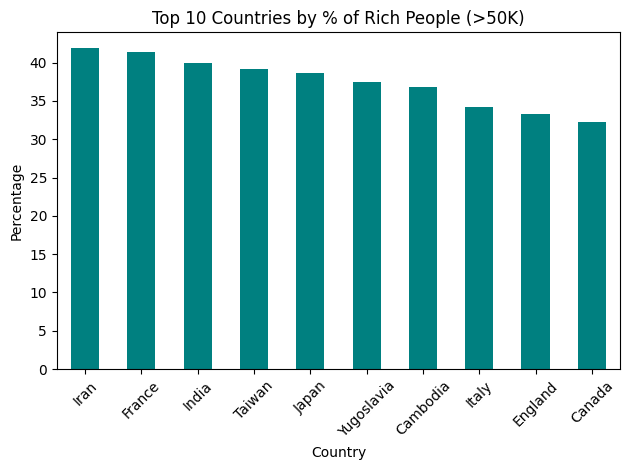

In [27]:
# @title
#top 10 countries by percentage of people earning >50K
top10_rich_countries = rich_country_percentages.sort_values(ascending=False).head(10)

# formatted table
top10_table = top10_rich_countries.reset_index()
top10_table.columns = ['Country', 'Percentage of People >50K']

# table
print("Top 10 Countries by Percentage of People Earning >50K:\n")
display(top10_table.style.background_gradient(cmap='Greens').format({'Percentage of People >50K': '{:.1f}%'}))

# Plot chart
top10_rich_countries.plot(kind='bar', color='teal')
plt.title('Top 10 Countries by % of Rich People (>50K)')
plt.ylabel('Percentage')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🧾 Summary of Insights

### Dataset Overview
The dataset contains **32,561 entries** with a diverse representation of races:

| Race                  | Count  |
|-----------------------|-------:|
| White                 | 27,816 |
| Black                 | 3,124  |
| Asian-Pac-Islander    | 1,039  |
| Amer-Indian-Eskimo    | 311    |
| Other                 | 271    |

### Key Statistics
- **Average age of men:** 39.4 years  
- **Percentage with Bachelor's degree:** 16.4%  
- **Percentage of higher-educated individuals earning >50K:** 46.5%  
- **Percentage of lower-educated individuals earning >50K:** 17.4%  
- **Minimum weekly work hours:** 1 hour  
- **Percentage of rich among those working minimum hours:** 10.0%  
- **Country with highest proportion of rich individuals:** India (41.9%)  
- **Most common occupation for high earners in India:** Prof-specialty  

### Insights
This analysis highlights how **education, occupation, and country of origin** influence income levels in the adult population. Higher education significantly increases the likelihood of earning >50K, while working hours and country of origin also play important roles. The dataset provides a clear view of socioeconomic patterns that can inform further studies or predictive modeling.
